In [1]:
import supy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from functions.util import *
from matplotlib import cm
import seaborn as sns

sp.show_version()

SuPy version: 2024.12.3.dev
-------------


In [ ]:
import xarray as xr
ds = xr.open_dataset('your_file.nc')

In [14]:
ds = xr.open_dataset(r'C:\suews_runs\russell_square.nc')
df = ds.to_dataframe()
df


surface_type  cos_solar_zenith_angle  nlayer  \
layer layer_interface column                                                 
1     1               0                  3                     0.5       8   
      2               0                  3                     0.5       8   
      3               0                  3                     0.5       8   
      4               0                  3                     0.5       8   
      5               0                  3                     0.5       8   
...                                    ...                     ...     ...   
8     5               0                  3                     0.5       8   
      6               0                  3                     0.5       8   
      7               0                  3                     0.5       8   
      8               0                  3                     0.5       8   
      9               0                  3                     0.5       8   

                              height  building_fraction  veg_fraction  \
layer layer_interface column                                            
1     1               0          0.0            0.46444      0.079818   
      2               0          4.0            0.46444      0.079818   
      3               0         12.0            0.46444      0.079818   
      4               0         20.0            0.46444      0.079818   
      5               0         28.0            0.46444      0.079818   
...                              ...                ...           ...   
8     5               0         28.0            0.00307      0.000000   
      6               0         36.0            0.00307      0.000000   
      7               0         44.0            0.00307      0.000000   
      8               0         56.0            0.00307      0.000000   
      9               0         80.0            0.00307      0.000000   

                              building_scale  veg_scale  ground_temperature  \
layer layer_interface column                                                  
1     1               0            31.932449   11.29051          283.149994   
      2               0            31.932449   11.29051          283.149994   
      3               0            31.932449   11.29051          283.149994   
      4               0            31.932449   11.29051          283.149994   
      5               0            31.932449   11.29051          283.149994   
...                                      ...        ...                 ...   
8     5               0            36.152660   21.00000          283.149994   
      6               0            36.152660   21.00000          283.149994   
      7               0            36.152660   21.00000          283.149994   
      8               0            36.152660   21.00000          283.149994   
      9               0            36.152660   21.00000          283.149994   

                              roof_temperature  wall_temperature  \
layer layer_interface column                                       
1     1               0             283.149994        283.149994   
      2               0             283.149994        283.149994   
      3               0             283.149994        283.149994   
      4               0             283.149994        283.149994   
      5               0             283.149994        283.149994   
...                                        ...               ...   
8     5               0             283.149994        283.149994   
      6               0             283.149994        283.149994   
      7               0             283.149994        283.149994   
      8               0             283.149994        283.149994   
      9               0             283.149994        283.149994   

                              ground_sw_albedo  roof_sw_albedo  \
layer layer_interface column                                     
1     1             

In [22]:
# df_state_initohm = sp.init_supy('C:/suews_runs/ohm.yml')

# df_state_initsamp = sp.init_supy('C:/suews_runs/oktest.yml')


# config = sp.data_model.init_config_from_yaml('C:/suews_runs/numetal.yml').to_df_state()

2025-02-24 13:54:49,501 - SuPy - WARNING - Input is not a yaml file, loading from other sources. These methods will be deprecated in later versions.


In [ ]:
df_state_initohm['popprof_24hr']

ind_dim,"(0, 0)","(0, 1)","(1, 0)","(1, 1)","(10, 0)","(10, 1)","(11, 0)","(11, 1)","(12, 0)","(12, 1)",...,"(5, 0)","(5, 1)","(6, 0)","(6, 1)","(7, 0)","(7, 1)","(8, 0)","(8, 1)","(9, 0)","(9, 1)"
grid,,,,,,,,,,,,,,,,,,,,,
11,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.5,1.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
df_state_init['popprof_24hr']

ind_dim,"(0, 0)","(0, 1)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(3, 0)","(3, 1)","(4, 0)","(4, 1)",...,"(19, 0)","(19, 1)","(20, 0)","(20, 1)","(21, 0)","(21, 1)","(22, 0)","(22, 1)","(23, 0)","(23, 1)"
grid,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.5,2.0,1.0,1.5,1.0,1.0


In [2]:
df_state_init, df_forcing = sp.load_SampleData()
grid = df_state_init.index[0]
# by default, two years of forcing data are included;
# to save running time for demonstration, we only use one year in this demo
df_forcing=df_forcing.loc['2012-07-05' : '2012-07-10'].iloc[1:]


2025-02-24 14:37:04,525 - SuPy - WARNING - This function name will be deprecated. Please use `load_sample_data()` instead.
2025-02-24 14:37:04,535 - SuPy - WARNING - Input is not a yaml file, loading from other sources. These methods will be deprecated in later versions.


In [10]:
df_state_initsamp = sp.data_model.init_config_from_yaml('C:/suews_runs/11_3layers.yaml').to_df_state()

df_state_initsamp['netradiationmethod'] = 1003
df_state_initsamp['storageheatmethod'] = 5
df_state_initsamp['ohmincqf'] = 1
df_state_initsamp['diagmethod'] = 0
# df_state_initsamp['netradiationmethod']

2025-02-24 14:38:01,800 - SuPy - WARNING - Input is not a yaml file, loading from other sources. These methods will be deprecated in later versions.


In [4]:
df_state_initsamp.filter(like = 'tsf')

var     tsfc_roof                 tsfc_wall                 tsfc_surf          \
ind_dim      (0,)    (1,)    (2,)      (0,)    (1,)    (2,)      (0,)    (1,)   
grid                                                                            
11         283.15  283.15  283.15    283.15  283.15  283.15    283.15  283.15   

var                                              
ind_dim    (2,)    (3,)    (4,)    (5,)    (6,)  
grid                                             
11       283.15  283.15  283.15  283.15  283.15

In [11]:
df_state_initsamp['netradiationmethod']
df_output, df_state_final = sp.run_supy(df_forcing, df_state_initsamp)


2025-02-24 14:38:04,964 - SuPy - INFO - ====================
2025-02-24 14:38:04,965 - SuPy - INFO - Simulation period:
2025-02-24 14:38:04,967 - SuPy - INFO -   Start: 2012-07-05 00:05:00
2025-02-24 14:38:04,968 - SuPy - INFO -   End: 2012-07-10 23:55:00
2025-02-24 14:38:04,969 - SuPy - INFO - 
2025-02-24 14:38:04,970 - SuPy - INFO - No. of grids: 1
2025-02-24 14:38:04,971 - SuPy - INFO - SuPy is running in serial mode
2025-02-24 14:38:10,166 - SuPy - INFO - Execution time: 5.2 s
2025-02-24 14:38:10,166 - SuPy - INFO - ====================



<Axes: xlabel='grid,datetime'>

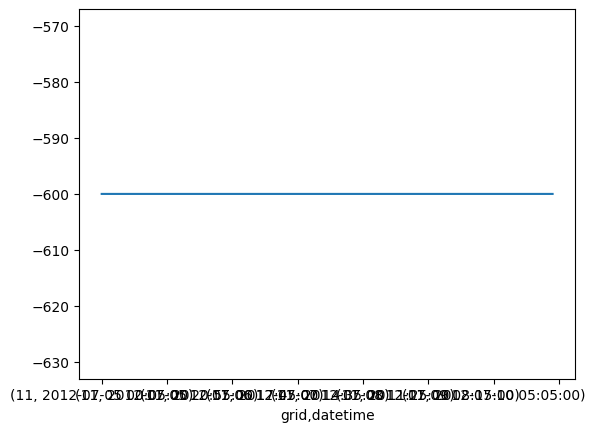

In [12]:
df_output.SUEWS['QN'].plot()

<Axes: xlabel='grid,datetime'>

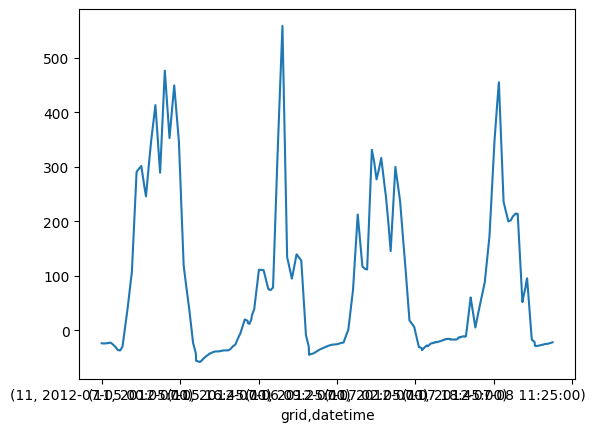

In [20]:
df_output.SUEWS['QN'].plot()

<Axes: xlabel='grid,datetime'>

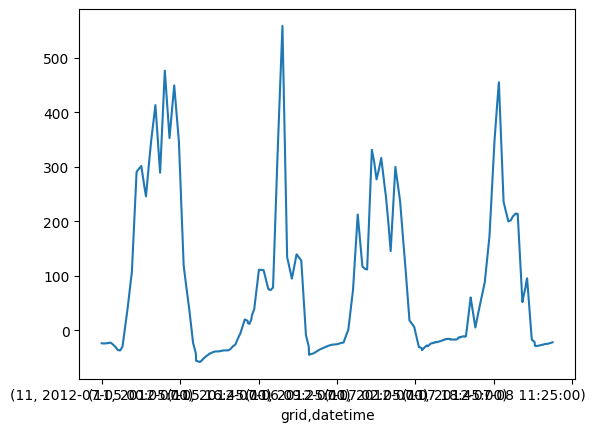

In [18]:
df_output.SUEWS['QN'].plot()

In [ ]:
def parse_nml_to_dict(nml_file):
    with open(nml_file, 'r') as file:
        nml_content = file.read()
    
    lines = nml_content.split('\n')
    nml_dict = {}
    current_section = None

    for line in lines:
        line = line.strip()
        if not line or line.startswith('/'):
            continue
        if line.startswith('&'):
            current_section = line[1:]
            nml_dict[current_section] = {}
        elif '=' in line:
            key, value = line.split('=', 1)
            key = key.strip()
            value = value.strip().rstrip(',')
            values = [float(v) if '.' in v else int(v) for v in value.split(',')]
            nml_dict[current_section][key] = values

    return nml_dict

def process_in_chunks(df_state_init, df_forcing, chunk_size=5):
    df_output_list = []
    df_state_final_list = []
    
    # Calculate the number of chunks needed
    num_iterations = (len(df_state_init) + chunk_size - 1) // chunk_size
    print(num_iterations)

    for i in range(num_iterations):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size
        df_chunk = df_state_init.iloc[start_idx:end_idx]
        
        df_output, df_state_final = sp.run_supy(df_forcing, df_chunk)
        df_output_list.append(df_output)
        df_state_final_list.append(df_state_final)
    
    # Concatenate all chunks
    df_output_merge = pd.concat(df_output_list)
    df_state_final_merge = pd.concat(df_state_final_list)
    
    return df_output_merge, df_state_final_merge

In [ ]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/noehc/'

typo = 'MC'
scenario = f'8_11_{typo}'

rc = infolder + 'RunControl_' + scenario + '.nml'
sel = infolder  + scenario + '/'

df_state_init = sp.init_supy(rc)

df_forcing = sp.load_forcing_grid(rc, 83)
df_forcing['U'] = df_forcing['U'].apply(lambda x: x if x >= 0.5 else 0.5)

p2s = '2018-06-28'
p2e = '2018-07-05'

AttributeError: 'NoneType' object has no attribute 'loc'

In [ ]:
# Dict used to assign unique and identifiable GridID
grid_conv_dict ={
    'TN' : {    # Traditional neighbourhood [1]
        83  : 81,
        113 : 111
    },
    'NF' : {    # Nordic Functionalism [2]
        83  : 82,
        113 : 112
    },
    'MP' : {    # Million programme [3]
        83  : 83,
        113 : 113
    },
    'MC' : {    # Mixed city [4]
        83  : 84,
        113 : 114
    }
}

# Read Spartacus Files, and merge to one state_init dataframe

In [ ]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/noehc/'

df_state_init = sp.init_supy(rc)

merge_state = df_state_init.copy()

for typo in list(grid_conv_dict.keys()):

    scenario = f'8_11_{typo}'

    rc = infolder + 'RunControl_' + scenario + '.nml'
    sel = infolder  + scenario + '/'

    df_state_init = sp.init_supy(rc)
    
    data = df_state_init.copy()

    # Function for reading GridLayoutFiles
    for grid in [83,113]:

        gridlayout_nml = sel + 'GridLayoutt' + str(grid) + '.nml'
        SS_dict = parse_nml_to_dict(gridlayout_nml)

        var = 'building_frac'
        data.loc[grid, (var, '(0,)')] = SS_dict['geom'][var][0]
        data.loc[grid, (var, '(1,)')] = SS_dict['geom'][var][1]
        data.loc[grid, (var, '(2,)')] = SS_dict['geom'][var][2]
        
        var = 'height'
        data.loc[grid, (var, '(0,)')] = SS_dict['geom'][var][0]
        data.loc[grid, (var, '(1,)')] = SS_dict['geom'][var][1]
        data.loc[grid, (var, '(2,)')] = SS_dict['geom'][var][2]
        data.loc[grid, (var, '(3,)')] = SS_dict['geom'][var][3]
        
        var = 'building_scale'
        data.loc[grid, (var, '(0,)')] = SS_dict['geom'][var][0]
        data.loc[grid, (var, '(1,)')] = SS_dict['geom'][var][1]
        data.loc[grid, (var, '(2,)')] = SS_dict['geom'][var][2]

        var = 'veg_frac'
        data.loc[grid, (var, '(0,)')] = SS_dict['geom'][var][0]
        data.loc[grid, (var, '(1,)')] = SS_dict['geom'][var][1]
        data.loc[grid, (var, '(2,)')] = SS_dict['geom'][var][2]

        var = 'veg_scale'
        data.loc[grid, (var, '(0,)')] = SS_dict['geom'][var][0]
        data.loc[grid, (var, '(1,)')] = SS_dict['geom'][var][1]
        data.loc[grid, (var, '(2,)')] = SS_dict['geom'][var][2]

        #############################   Roof ###############################
        for surf in ['roof', 'wall']:
        
            for var in ['sfr','tin', 'alb','emis']:
                var_surf = var + '_' + surf 
                data.loc[grid, (var_surf, '(0,)')] = SS_dict[surf][var_surf][0]
                data.loc[grid, (var_surf, '(1,)')] = SS_dict[surf][var_surf][1]
                data.loc[grid, (var_surf, '(2,)')] = SS_dict[surf][var_surf][2]

            for vlayer in [0,1,2]:
                for hlayer in [0,1,2,3,4]:
                    # Vertical Layer 1
                    var = 'dz_' + surf
                    data.loc[grid,(var, f'({vlayer}, {hlayer})')] = SS_dict[surf][f'{var}({vlayer+1},:)'][hlayer]
                    var = 'k_' + surf
                    data.loc[grid,(var, f'({vlayer}, {hlayer})')] = SS_dict[surf][f'{var}({vlayer+1},:)'][hlayer]
                    var = 'cp_' + surf
                    data.loc[grid,(var, f'({vlayer}, {hlayer})')] = SS_dict[surf][f'{var}({vlayer+1},:)'][hlayer]

    merge_state.loc[grid_conv_dict[typo][83]] = data.loc[83]
    merge_state.loc[grid_conv_dict[typo][113]] = data.loc[113]


2025-01-24 09:10:21,333 - SuPy - INFO - All cache cleared.
2025-01-24 09:10:22,255 - SuPy - INFO - All cache cleared.
2025-01-24 09:10:23,328 - SuPy - INFO - All cache cleared.
2025-01-24 09:10:24,425 - SuPy - INFO - All cache cleared.
2025-01-24 09:10:32,363 - SuPy - INFO - All cache cleared.


In [ ]:
# Just check so that spartacus values has been updated 
merge_state.filter(like='alb_roof')

var     alb_roof            
ind_dim     (0,)  (1,)  (2,)
grid                        
83          0.18  0.18  0.18
113         0.18  0.18  0.18
81          0.20  0.20  0.20
111         0.20  0.20  0.20
82          0.20  0.20  0.20
112         0.20  0.20  0.20
84          0.06  0.06  0.06
114         0.06  0.06  0.06

In [ ]:
merge_state.loc[:, 'netradiationmethod'] = 3
merge_state.loc[:, 'storageheatmethod'] = 1 # OHM
df_output_2017, df_final_state_2017 = process_in_chunks(merge_state, df_forcing.loc['2017-01-01': '2017-12-31'], chunk_size = 3)

3
2025-01-24 09:11:07,334 - SuPy - INFO - ====================
2025-01-24 09:11:07,335 - SuPy - INFO - Simulation period:
2025-01-24 09:11:07,335 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-01-24 09:11:07,336 - SuPy - INFO -   End: 2017-12-31 23:55:00
2025-01-24 09:11:07,337 - SuPy - INFO - 
2025-01-24 09:11:07,338 - SuPy - INFO - No. of grids: 3
2025-01-24 09:11:07,339 - SuPy - INFO - SuPy is running in serial mode


2025-01-24 09:13:05,894 - SuPy - INFO - Execution time: 118.6 s
2025-01-24 09:13:05,895 - SuPy - INFO - ====================

2025-01-24 09:13:05,899 - SuPy - INFO - ====================
2025-01-24 09:13:05,899 - SuPy - INFO - Simulation period:
2025-01-24 09:13:05,900 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-01-24 09:13:05,900 - SuPy - INFO -   End: 2017-12-31 23:55:00
2025-01-24 09:13:05,901 - SuPy - INFO - 
2025-01-24 09:13:05,902 - SuPy - INFO - No. of grids: 3
2025-01-24 09:13:05,902 - SuPy - INFO - SuPy is running in serial mode
2025-01-24 09:15:02,554 - SuPy - INFO - Execution time: 116.7 s
2025-01-24 09:15:02,555 - SuPy - INFO - ====================

2025-01-24 09:15:02,558 - SuPy - INFO - ====================
2025-01-24 09:15:02,559 - SuPy - INFO - Simulation period:
2025-01-24 09:15:02,559 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-01-24 09:15:02,560 - SuPy - INFO -   End: 2017-12-31 23:55:00
2025-01-24 09:15:02,561 - SuPy - INFO - 
2025-01-24 09:15:02,562 - S

In [ ]:
p2s = '2018-06-28'
p2e = '2018-07-05'
# Start date
start_date = '2018-01-01 00:00:00'
# p2
df_output_2017, df_state_spinup = process_in_chunks(df_final_state_2017.loc[start_date], df_forcing.loc[start_date: p2s], chunk_size = 3)


3
2025-01-24 09:28:56,363 - SuPy - INFO - ====================
2025-01-24 09:28:56,364 - SuPy - INFO - Simulation period:
2025-01-24 09:28:56,365 - SuPy - INFO -   Start: 2018-01-01 00:00:00
2025-01-24 09:28:56,366 - SuPy - INFO -   End: 2018-06-28 23:55:00
2025-01-24 09:28:56,367 - SuPy - INFO - 
2025-01-24 09:28:56,368 - SuPy - INFO - No. of grids: 3
2025-01-24 09:28:56,368 - SuPy - INFO - SuPy is running in serial mode
2025-01-24 09:29:57,625 - SuPy - INFO - Execution time: 61.3 s
2025-01-24 09:29:57,632 - SuPy - INFO - ====================

2025-01-24 09:29:57,632 - SuPy - INFO - ====================
2025-01-24 09:29:57,632 - SuPy - INFO - Simulation period:
2025-01-24 09:29:57,638 - SuPy - INFO -   Start: 2018-01-01 00:00:00
2025-01-24 09:29:57,638 - SuPy - INFO -   End: 2018-06-28 23:55:00
2025-01-24 09:29:57,638 - SuPy - INFO - 
2025-01-24 09:29:57,638 - SuPy - INFO - No. of grids: 3
2025-01-24 09:29:57,638 - SuPy - INFO - SuPy is running in serial mode
2025-01-24 09:30:58,797 -

In [ ]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/noehc/'

sp.save_supy(df_output_2017, df_state_spinup, path_dir_save= infolder + '/8_11_Output')


[WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/81_2018_DailyState.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/83_2018_DailyState.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/113_2018_DailyState.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/82_2018_DailyState.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/111_2018_DailyState.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/112_2018_DailyState.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/84_2018_DailyState.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/114_2018_DailyState.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/81_2018_BEERS_5.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology_test/data/noehc/8_11_Output/81_2018_BEERS_60.txt'),
 WindowsPath('C:/GitHub/SUEWS_DB_Typology

# Read spinup-states

In [ ]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/noehc/'

df_state = sp.init_supy(infolder + '/8_11_Output/df_state.csv')
df_state = df_state.loc['2018-06-29']


In [ ]:
df_state.loc[:, 'netradiationmethod'] = 1003

# SpartacusOHM
df_output, df_final_state = process_in_chunks(df_state, df_forcing.loc[p2s: p2e], chunk_size = 3)
df_suews = df_output.SUEWS


3
2025-01-24 09:33:41,497 - SuPy - INFO - ====================
2025-01-24 09:33:41,497 - SuPy - INFO - Simulation period:
2025-01-24 09:33:41,505 - SuPy - INFO -   Start: 2018-06-28 00:00:00
2025-01-24 09:33:41,505 - SuPy - INFO -   End: 2018-07-05 23:55:00
2025-01-24 09:33:41,506 - SuPy - INFO - 
2025-01-24 09:33:41,506 - SuPy - INFO - No. of grids: 3
2025-01-24 09:33:41,506 - SuPy - INFO - SuPy is running in serial mode
2025-01-24 09:38:52,735 - SuPy - INFO - Execution time: 311.2 s
2025-01-24 09:38:52,735 - SuPy - INFO - ====================

2025-01-24 09:38:52,735 - SuPy - INFO - ====================
2025-01-24 09:38:52,735 - SuPy - INFO - Simulation period:
2025-01-24 09:38:52,735 - SuPy - INFO -   Start: 2018-06-28 00:00:00
2025-01-24 09:38:52,735 - SuPy - INFO -   End: 2018-07-05 23:55:00
2025-01-24 09:38:52,735 - SuPy - INFO - 
2025-01-24 09:38:52,735 - SuPy - INFO - No. of grids: 3
2025-01-24 09:38:52,735 - SuPy - INFO - SuPy is running in serial mode
2025-01-24 09:43:32,254 

# Set up df plotting

### Grid 8

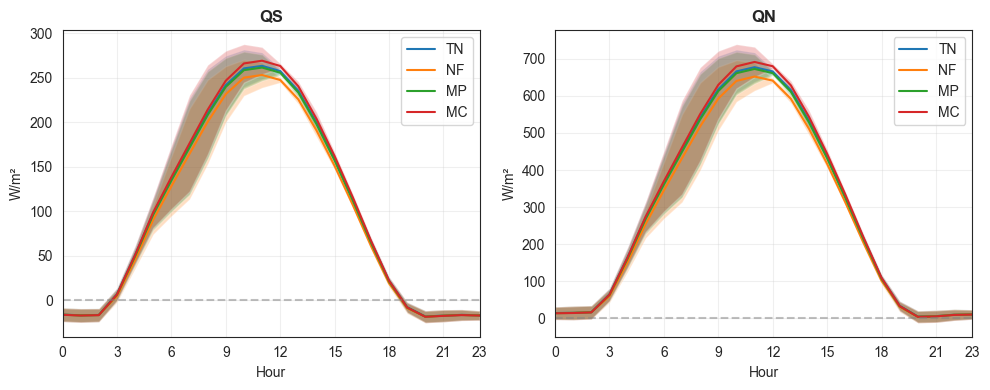

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
grid_name_dict = {
    81: 'TN',
    82: 'NF',
    83: 'MP',
    84: 'MC',
}

for var, axs in zip(['QS','QN'],[0,1]):
# Filter data for loc 11, 12, and 13
    for grid in list(grid_name_dict.keys()):
        # Resample to hourly means
        hourly_means = df_suews.loc[grid].resample('60min').mean()

        # Calculate the mean and standard deviation for each hour of the day
        hourly_means['hour'] = hourly_means.index.hour
        # # hourly_means

        diurnal_mean = hourly_means.groupby('hour').mean()
        diurnal_std = hourly_means.groupby('hour').std()
        # Plotting
        sns.lineplot(x=diurnal_mean.index, y=diurnal_mean[var], label=f'{grid_name_dict[grid]}', ax=ax[axs])
        # ax[axs].plot(diurnal_mean.index, diurnal_mean[var], label=f'Grid {grid}')
        ax[axs].fill_between(diurnal_mean.index, diurnal_mean[var] - diurnal_std[var], diurnal_mean[var] + diurnal_std[var], alpha=0.25)
        ax[axs].set_title(var, fontweight = 'bold')

for i in [0,1]:
    ax[i].set_xlim(0,23)
    ax[i].set_xlabel('Hour')
    ax[i].set_ylabel('W/m²')
    ax[i].legend()
    ax[i].axhline(0,color = 'grey', linestyle = '--' , alpha = 0.5)
    ax[i].set_xticks([0,3,6,9,12,15,18,21,23])
    ax[i].grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()


### Grid 11

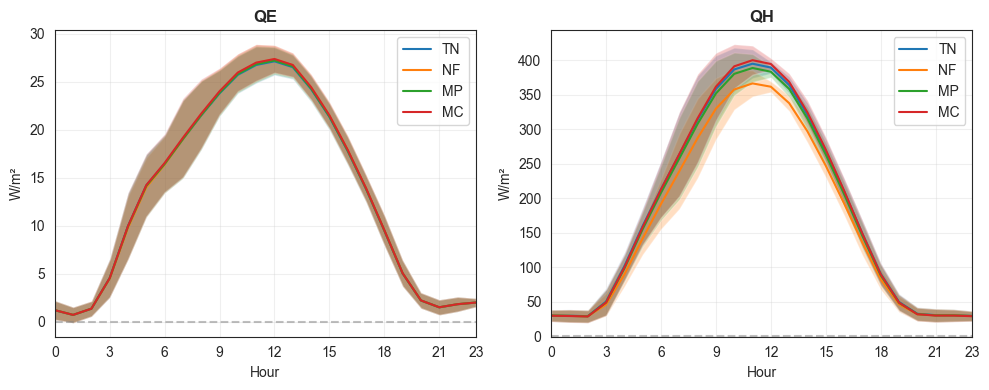

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
grid_name_dict = {
    111: 'TN',
    112: 'NF',
    113: 'MP',
    114: 'MC',
}

for var, axs in zip(['QE','QH'],[0,1]):
# Filter data for loc 11, 12, and 13
    for grid in list(grid_name_dict.keys()):
        # Resample to hourly means
        hourly_means = df_suews.loc[grid].resample('60S').mean()

        # Calculate the mean and standard deviation for each hour of the day
        hourly_means['hour'] = hourly_means.index.hour
        # # hourly_means

        diurnal_mean = hourly_means.groupby('hour').mean()
        diurnal_std = hourly_means.groupby('hour').std()
        # Plotting
        sns.lineplot(x=diurnal_mean.index, y=diurnal_mean[var], label=f'{grid_name_dict[grid]}', ax=ax[axs])
        # ax[axs].plot(diurnal_mean.index, diurnal_mean[var], label=f'Grid {grid}')
        ax[axs].fill_between(diurnal_mean.index, diurnal_mean[var] - diurnal_std[var], diurnal_mean[var] + diurnal_std[var], alpha=0.25)
        ax[axs].set_title(var, fontweight = 'bold')

for i in [0,1]:
    ax[i].set_xlim(0,23)
    ax[i].set_xlabel('Hour')
    ax[i].set_ylabel('W/m²')
    ax[i].legend()
    ax[i].axhline(0,color = 'grey', linestyle = '--' , alpha = 0.5)
    ax[i].set_xticks([0,3,6,9,12,15,18,21,23])
    ax[i].grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

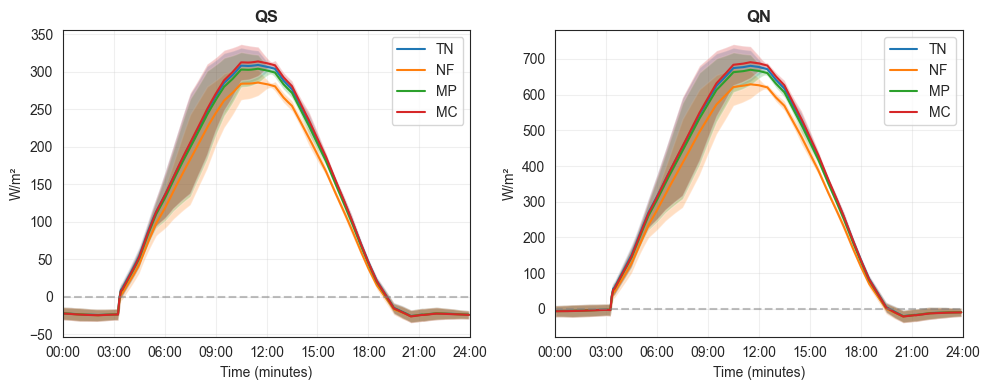

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
grid_name_dict = {
    111: 'TN',
    112: 'NF',
    113: 'MP',
    114: 'MC',
}

for var, axs in zip(['QS', 'QN'], [0, 1]):
    # Filter data for loc 11, 12, and 13
    for grid in list(grid_name_dict.keys()):
        # Resample to 5-minute means
        five_minute_means = df_suews.loc[grid].resample('5min').mean()

        # Ensure the time index is properly formatted
        five_minute_means['time'] = five_minute_means.index.strftime('%H:%M')
        five_minute_means['time'] = pd.to_datetime(five_minute_means['time'], format='%H:%M')

        # Calculate the mean and standard deviation for each 5-minute interval
        diurnal_mean = five_minute_means.groupby(five_minute_means['time'].dt.time).mean()
        diurnal_std = five_minute_means.groupby(five_minute_means['time'].dt.time).std()

        # Convert time to numeric format for plotting
        diurnal_mean['time_numeric'] = diurnal_mean.index.map(lambda t: t.hour * 60 + t.minute)
        diurnal_std['time_numeric'] = diurnal_std.index.map(lambda t: t.hour * 60 + t.minute)

        # Plotting
        sns.lineplot(x=diurnal_mean['time_numeric'], y=diurnal_mean[var], label=f'{grid_name_dict[grid]}', ax=ax[axs])
        ax[axs].fill_between(diurnal_mean['time_numeric'], diurnal_mean[var] - diurnal_std[var], diurnal_mean[var] + diurnal_std[var], alpha=0.25)
        ax[axs].set_title(var, fontweight='bold')

for i in [0, 1]:
    ax[i].set_xlim(0, 1440)  # 1440 minutes in a day
    ax[i].set_xlabel('Time (minutes)')
    ax[i].set_ylabel('W/m²')
    ax[i].legend()
    ax[i].axhline(0, color='grey', linestyle='--', alpha=0.5)
    ax[i].set_xticks([0, 180, 360, 540, 720, 900, 1080, 1260, 1440])
    ax[i].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', '24:00'])
    ax[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


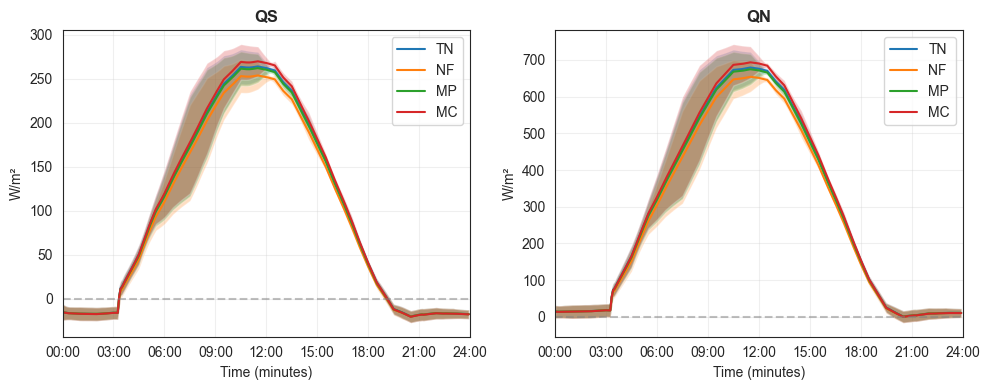

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
grid_name_dict = {
    81: 'TN',
    82: 'NF',
    83: 'MP',
    84: 'MC',
}

for var, axs in zip(['QS', 'QN'], [0, 1]):
    # Filter data for loc 11, 12, and 13
    for grid in list(grid_name_dict.keys()):
        # Resample to 5-minute means
        five_minute_means = df_suews.loc[grid].resample('5min').mean()

        # Ensure the time index is properly formatted
        five_minute_means['time'] = five_minute_means.index.strftime('%H:%M')
        five_minute_means['time'] = pd.to_datetime(five_minute_means['time'], format='%H:%M')

        # Calculate the mean and standard deviation for each 5-minute interval
        diurnal_mean = five_minute_means.groupby(five_minute_means['time'].dt.time).mean()
        diurnal_std = five_minute_means.groupby(five_minute_means['time'].dt.time).std()

        # Convert time to numeric format for plotting
        diurnal_mean['time_numeric'] = diurnal_mean.index.map(lambda t: t.hour * 60 + t.minute)
        diurnal_std['time_numeric'] = diurnal_std.index.map(lambda t: t.hour * 60 + t.minute)

        # Plotting
        sns.lineplot(x=diurnal_mean['time_numeric'], y=diurnal_mean[var], label=f'{grid_name_dict[grid]}', ax=ax[axs])
        ax[axs].fill_between(diurnal_mean['time_numeric'], diurnal_mean[var] - diurnal_std[var], diurnal_mean[var] + diurnal_std[var], alpha=0.25)
        ax[axs].set_title(var, fontweight='bold')

for i in [0, 1]:
    ax[i].set_xlim(0, 1440)  # 1440 minutes in a day
    ax[i].set_xlabel('Time (minutes)')
    ax[i].set_ylabel('W/m²')
    ax[i].legend()
    ax[i].axhline(0, color='grey', linestyle='--', alpha=0.5)
    ax[i].set_xticks([0, 180, 360, 540, 720, 900, 1080, 1260, 1440])
    ax[i].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', '24:00'])
    ax[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


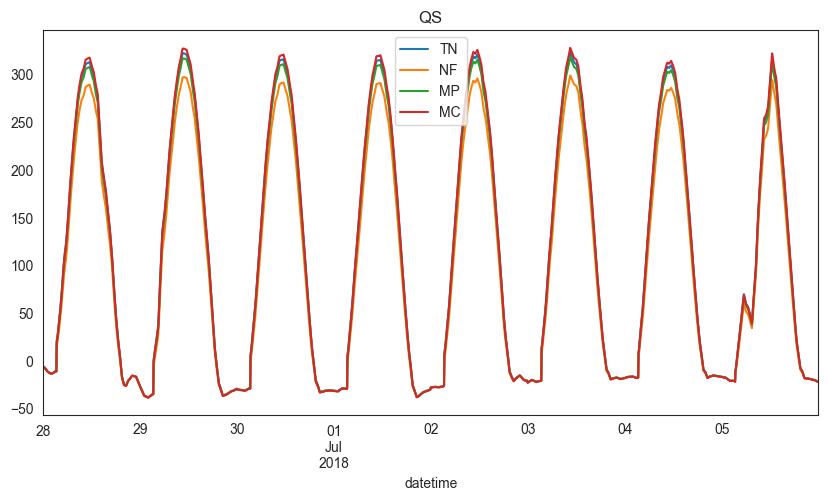

In [ ]:
var = 'QS'
df_d = pd.DataFrame()

df_d[111] = df_suews.loc[111,var]
df_d[112] = df_suews.loc[112,var]
df_d[113] = df_suews.loc[113,var]
df_d[114] = df_suews.loc[114,var]

ax = df_d.plot(figsize = (10,5))
ax.set_title(var)

ax.legend(list(grid_conv_dict.keys()))

In [ ]:
df_state_ohm = df_state.copy()

grid = 114
surface = 1 #{ Paved, Bldgs, EveTr, DecTr, Grass, BSoil, Water, one extra land cover type (currently NOT used)}
period = [0,1,2,3]# '{SummerWet, SummerDry, WinterWet, WinterDry}'

# OHM as of Star - Ceramic Tile Meyn and Oke
a1 = 0.07
a2 = 0.26
a3 = -6

for p in period:
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 0)')] = a1
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 1)')] = a2
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 2)')] = a3


# Asphalt shingle on plywood residential roof , Vancouver
a1 = 0.14
a2 = 0.33
a3 = -6

for p in period:
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 0)')] = a1
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 1)')] = a2
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 2)')] = a3


# Star – high albedo asphalt shingle residential roof
a1 = 0.09
a2 = 0.18
a3 = -1

for p in period:
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 0)')] = a1
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 1)')] = a2
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 2)')] = a3


# Tar
a1 = 0.17
a2 = 0.01
a3 = -17

for p in period:
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 0)')] = a1
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 1)')] = a2
    df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 2)')] = a3


In [ ]:
print(df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 0)')])
print(df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 1)')])
print(df_state_ohm.loc[grid, ('ohm_coef', f'({surface}, {p}, 2)')])

0.17
0.01
-17.0


In [ ]:
df_ouptut_ohm4, state_ohm = sp.run_supy( df_forcing.loc[p2s:p2e],df_state_ohm.loc[[114]])

2025-01-24 15:07:59,525 - SuPy - INFO - ====================
2025-01-24 15:07:59,525 - SuPy - INFO - Simulation period:
2025-01-24 15:07:59,537 - SuPy - INFO -   Start: 2018-06-28 00:00:00
2025-01-24 15:07:59,537 - SuPy - INFO -   End: 2018-07-05 23:55:00
2025-01-24 15:07:59,540 - SuPy - INFO - 
2025-01-24 15:07:59,540 - SuPy - INFO - No. of grids: 1
2025-01-24 15:07:59,540 - SuPy - INFO - SuPy is running in serial mode
2025-01-24 15:09:17,744 - SuPy - INFO - Execution time: 78.2 s
2025-01-24 15:09:17,744 - SuPy - INFO - ====================



In [ ]:
ohm_sues = df_ouptut_ohm.SUEWS
ohm_sues2 = df_ouptut_ohm2.SUEWS
ohm_sues3 = df_ouptut_ohm3.SUEWS
ohm_sues4 = df_ouptut_ohm4.SUEWS


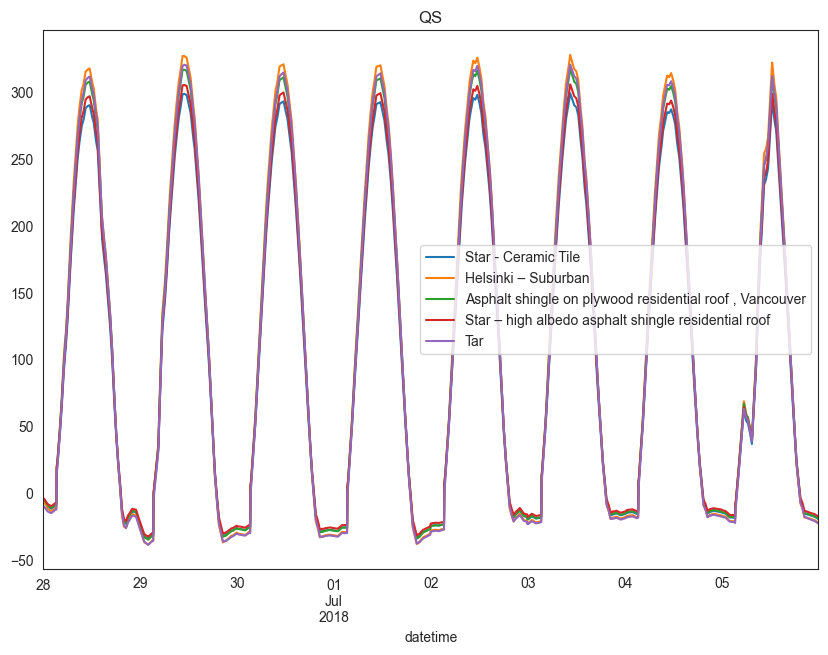

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))

for var, axs  in zip(['QS'], [0]):

    ohm_sues.loc[114,var].plot(ax = ax)
    df_suews.loc[114,var].plot(ax = ax)
    ohm_sues2.loc[114,var].plot(ax=ax)
    ohm_sues3.loc[114,var].plot(ax=ax)
    ohm_sues4.loc[114,var].plot(ax=ax)
    ax.set_title(var)


ax.legend(['Star - Ceramic Tile', 'Helsinki – Suburban', 'Asphalt shingle on plywood residential roof , Vancouver','Star – high albedo asphalt shingle residential roof', 'Tar'])#, bbox_to_anchor=(-0.5, -0.11))



# BLend OHM TEST

In [ ]:
df_state_ohm = df_state.copy()
df_temp = df_state.copy()
df_test = df_state.copy()

surface = 1 #{ Paved, Bldgs, EveTr, DecTr, Grass, BSoil, Water, one extra land cover type (currently NOT used)}
period = [0,1,2,3]# '{SummerWet, SummerDry, WinterWet, WinterDry}'

# OHM as of Star - Ceramic Tile Meyn and Oke

df_test.columns = df_state.columns
df_test.loc[1] = df_state.loc[114]
df_test.loc[2] = df_state.loc[114]
df_test.loc[3] = df_state.loc[114]

df_test = df_test.loc[[1,2,3]]

df_test.loc[:,'timezone'] = 0
df_test['ohmincqf'] = 0

# OHM as of Star - Ceramic Tile Meyn and Oke
a11 = 0.82
a21 = 0.34
a31 = -55.7
   	     	    	    	  
# a11 = df_state_init.loc[1, ('ohm_coef', '(1, 0, 0)')]
# a21 = df_state_init.loc[1, ('ohm_coef', '(1, 0, 1)')]
# a31 = df_state_init.loc[1, ('ohm_coef', '(1, 0, 2)')]

for p in period:
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 0)')] = a11
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 1)')] = a21
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 2)')] = a31


# Star – high albedo asphalt shingle residential roof
a12 = 0.09
a22 = 0.18
a32 = -1

for p in period:
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 0)')] = a12
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 1)')] = a22
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 2)')] = a32

weight1 = 0.5
weight2 = 1 -weight1

a13 = np.average([a11, a12], weights=[weight1, weight2])
a23 = np.average([a21, a22], weights=[weight1, weight2])
a33 = np.average([a31, a32], weights=[weight1, weight2])

for p in period:
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 0)')] = a13
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 1)')] = a23
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 2)')] = a33


# Create the markdown table
markdown_table = f"""
| grid| a1    | a2    | a3   |
|-----|-------|-------|------|
|  1  | {a11}  | {a21}  |{a31} |
|  2  | {a12}  | {a22}  | {a32}   |
| mix | {round(a13,2)}  | {a23}  |{a33}|
"""

print(markdown_table)




| grid| a1    | a2    | a3   |
|-----|-------|-------|------|
|  1  | 0.82  | 0.34  |-55.7 |
|  2  | 0.09  | 0.18  | -1   |
| mix | 0.45  | 0.26  |-28.35|



In [ ]:
df_state_ohm = df_state.copy()
df_temp = df_state.copy()
df_test = df_state.copy()

surface = 1 #{ Paved, Bldgs, EveTr, DecTr, Grass, BSoil, Water, one extra land cover type (currently NOT used)}
period = [0,1,2,3]# '{SummerWet, SummerDry, WinterWet, WinterDry}'

# OHM as of Star - Ceramic Tile Meyn and Oke

df_test.columns = df_state.columns
df_test.loc[1] = df_state.loc[114]
df_test.loc[2] = df_state.loc[114]
df_test.loc[3] = df_state.loc[114]

df_test = df_test.loc[[1,2,3]]

df_test.loc[:,'timezone'] = 0
df_test['ohmincqf'] = 0

# OHM as of Star - Ceramic Tile Meyn and Oke
a11 = 0.82
a21 = 0.34
a31 = -55.7

#  "Roof         (own            for            SMEAR         III,          Helsinki)"  	 Jarvi         et          al.    	 
a14 = 0.19
a24 = 0.54
a34 = -15.
   	     	    	    	  
# a11 = df_state_init.loc[1, ('ohm_coef', '(1, 0, 0)')]
# a21 = df_state_init.loc[1, ('ohm_coef', '(1, 0, 1)')]
# a31 = df_state_init.loc[1, ('ohm_coef', '(1, 0, 2)')]

for p in period:
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 0)')] = a11
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 1)')] = a21
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 2)')] = a31


# Star – high albedo asphalt shingle residential roof
a12 = 0.09
a22 = 0.18
a32 = -1

for p in period:
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 0)')] = a12
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 1)')] = a22
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 2)')] = a32

weight1 = 0.25
weight3 = 0.1
weight2 = 1 -weight1 - weight3

a13 = np.average([a11, a12, a14], weights=[weight1, weight2, weight3])
a23 = np.average([a21, a22, a24], weights=[weight1, weight2, weight3])
a33 = np.average([a31, a32, a34], weights=[weight1, weight2, weight3])

for p in period:
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 0)')] = a13
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 1)')] = a23
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 2)')] = a33


# Create the markdown table
markdown_table = f"""
| grid| a1    | a2    | a3   |
|-----|-------|-------|------|
|  1  | {a11}  | {a21}  |{a31} |
|  2  | {a12}  | {a22}  | {a32}   |
| mix | {round(a13,2)}  | {a23}  |{a33}|
"""

print(markdown_table)



| grid| a1    | a2    | a3   |
|-----|-------|-------|------|
|  1  | 0.82  | 0.34  |-55.7 |
|  2  | 0.09  | 0.18  | -1   |
| mix | 0.28  | 0.256  |-16.075000000000003|



In [ ]:
df_state.loc[:, 'netradiationmethod'] = 1003
df_state.loc[:, 'storageheatmethod'] =  5 #EHC #1 # OHM
df_state.loc[:, 'ohmincqf'] = 0
df_state.loc[:, 'roughlenmommethod'] = 2
df_state.loc[:, 'roughlenheatmethod'] = 4
df_state.loc[:, 'stabilitymethod'] = 3

df_ohmtest, state_ohm = sp.run_supy( df_forcing.loc[p2s:p2e], df_state.loc[[111]])
ohm_suews = df_ohmtest.SUEWS.loc[:]


2025-02-04 10:51:49,989 - SuPy - INFO - ====================
2025-02-04 10:51:49,992 - SuPy - INFO - Simulation period:
2025-02-04 10:51:49,995 - SuPy - INFO -   Start: 2018-06-28 00:00:00
2025-02-04 10:51:49,997 - SuPy - INFO -   End: 2018-07-05 23:55:00
2025-02-04 10:51:50,000 - SuPy - INFO - 
2025-02-04 10:51:50,002 - SuPy - INFO - No. of grids: 1
2025-02-04 10:51:50,004 - SuPy - INFO - SuPy is running in serial mode


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 443, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\GitHub\\SUEWS_DB_Typology_test\\data\\noehc\\SuPy.log' -> 'c:\\GitHub\\SUEWS_DB_Typology_test\\data\\noehc\\SuPy.log.2025-02-03'
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\si

2025-02-04 10:56:12,085 - SuPy - INFO - Execution time: 262.1 s
2025-02-04 10:56:12,085 - SuPy - INFO - ====================



--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 443, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\GitHub\\SUEWS_DB_Typology_test\\data\\noehc\\SuPy.log' -> 'c:\\GitHub\\SUEWS_DB_Typology_test\\data\\noehc\\SuPy.log.2025-02-03'
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\si

In [ ]:
ohm_suews.loc[1].plot.scatter(
    x='QN',y='QS',s = 1.2)

KeyError: 1

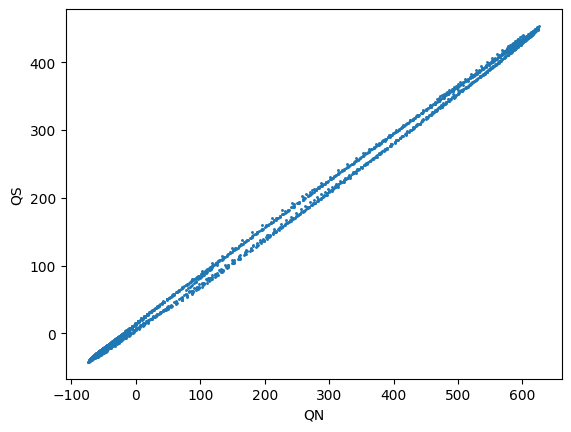

In [ ]:
ax = df_output.SUEWS.plot.scatter(x= 'QN', y = 'QS', s=1.2)

2025-02-03 15:09:28,442 - SuPy - INFO - ====================
2025-02-03 15:09:28,449 - SuPy - INFO - Simulation period:
2025-02-03 15:09:28,450 - SuPy - INFO -   Start: 2018-06-28 00:00:00
2025-02-03 15:09:28,450 - SuPy - INFO -   End: 2018-07-05 23:55:00
2025-02-03 15:09:28,450 - SuPy - INFO - 
2025-02-03 15:09:28,452 - SuPy - INFO - No. of grids: 3
2025-02-03 15:09:28,452 - SuPy - INFO - SuPy is running in serial mode
2025-02-03 15:09:31,831 - SuPy - INFO - Execution time: 3.4 s
2025-02-03 15:09:31,831 - SuPy - INFO - ====================



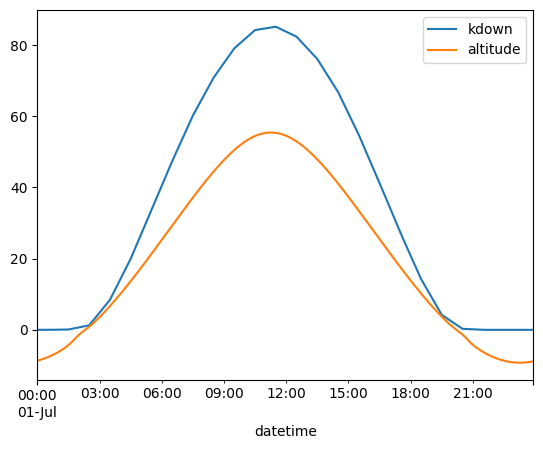

In [ ]:


ax = ((df_forcing.loc['2018-07-01', 'kdown'])/10).plot()
df_ohmtest.BEERS.loc[1].loc['2018-07-01','altitude'].plot(ax = ax)

ax.legend()

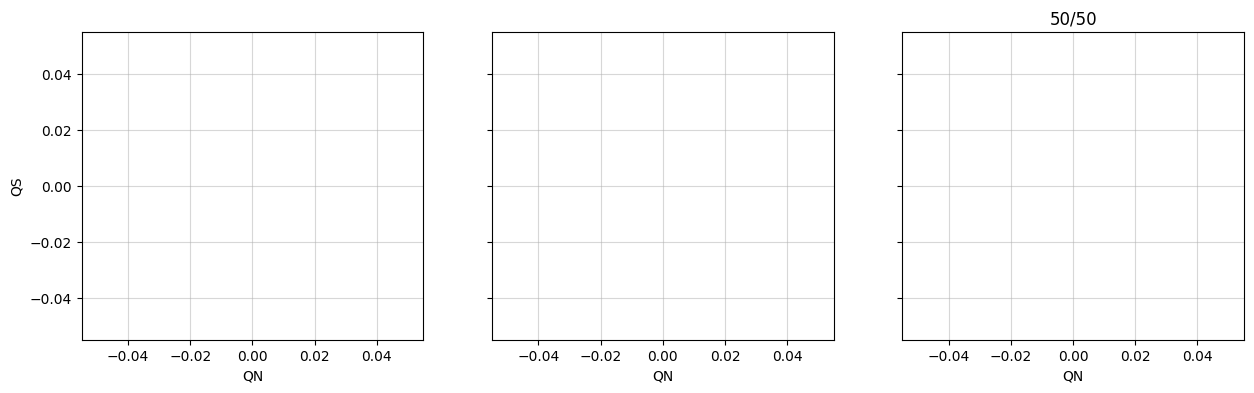

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,4), sharey=True, sharex=True)

ohm_suews = df_ohmtest.SUEWS.loc[:]

# resampled_df = ohm_suews.resample('30min').mean()

ohm_suews.loc[1].loc['2018-07-01'].plot.scatter(
    x='QN',y='QS',s = 1.5, ax = ax[0])
ohm_suews.loc[2].loc['2018-07-01'].plot.scatter(
    x='QN',y='QS', s = 1.5 ,color = 'red', ax = ax[1])
ohm_suews.loc[3].loc['2018-07-01'].plot.scatter(
    x='QN',y='QS', s = 1.5 , color = 'purple', ax = ax[2]).set_title('50/50')

for a in [0,1,2]:
    ax[a].grid(alpha = 0.5)

<Axes: xlabel='grid,datetime'>

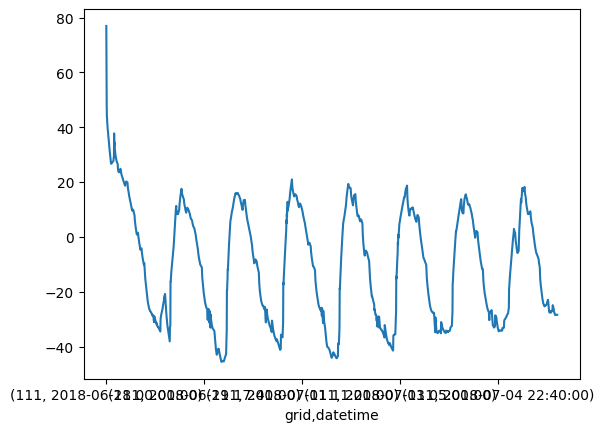

In [ ]:
ohm_suews['QS'].plot()

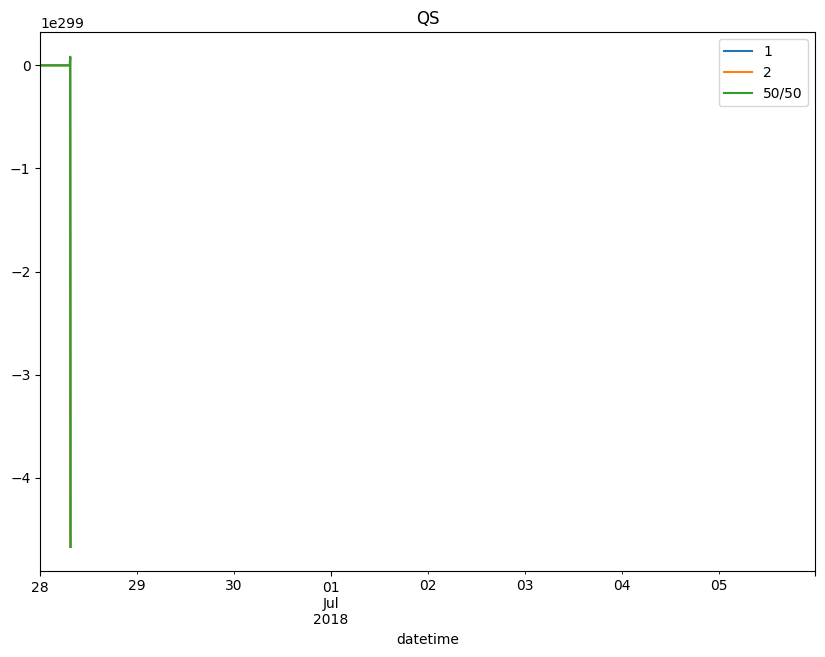

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))

ohm_suews = df_ohmtest.SUEWS
for var, axs  in zip(['QS'], [0]):

    ohm_suews.loc[1,var].plot(ax = ax)
    ohm_suews.loc[2,var].plot(ax = ax)
    ohm_suews.loc[3,var].plot(ax=ax)

    ax.set_title(var)
ax.legend(['1','2', '50/50'])

# 2

In [ ]:
df_state_ohm = df_state.copy()
df_temp = df_state.copy()
df_test = df_state.copy()

surface = 1 #{ Paved, Bldgs, EveTr, DecTr, Grass, BSoil, Water, one extra land cover type (currently NOT used)}
period = [0,1,2,3]# '{SummerWet, SummerDry, WinterWet, WinterDry}'

# OHM as of Star - Ceramic Tile Meyn and Oke

df_test.columns = df_state.columns
df_test.loc[1] = df_state.loc[114]
df_test.loc[2] = df_state.loc[114]
df_test.loc[3] = df_state.loc[114]

df_test = df_test.loc[[1,2,3]]


# OHM as of Star - Ceramic Tile Meyn and Oke
a11 = 0.07
a21 = 0.26
a31 = -6

for p in period:
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 0)')] = a11
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 1)')] = a21
    df_test.loc[1, ('ohm_coef', f'({surface}, {p}, 2)')] = a31


# Star – high albedo asphalt shingle residential roof
# Tar
a12 = 0.17
a22 = 0.01
a32 = -17

for p in period:
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 0)')] = a12
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 1)')] = a22
    df_test.loc[2, ('ohm_coef', f'({surface}, {p}, 2)')] = a32

weight1 = 0.5
weight2 = 1 -weight1

a13 = np.average([a11, a12], weights=[weight1, weight2])
a23 = np.average([a21, a22], weights=[weight1, weight2])
a33 = np.average([a31, a32], weights=[weight1, weight2])

for p in period:
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 0)')] = a13
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 1)')] = a23
    df_test.loc[3, ('ohm_coef', f'({surface}, {p}, 2)')] = a33


# Create the markdown table
markdown_table = f"""
| grid| a1    | a2    | a3   |
|-----|-------|-------|------|
|  1  | {a11}  | {a21}  | {a31}   |
|  2  | {a12}  | {a22}  | {a32}  |
| mix | {round(a13, 2)}  | {a23} | {a33}|
"""
print(markdown_table)



| grid| a1    | a2    | a3   |
|-----|-------|-------|------|
|  1  | 0.07  | 0.26  | -6   |
|  2  | 0.17  | 0.01  | -17  |
| mix | 0.12  | 0.135 | -11.5|



In [ ]:
df_ohmtest2, state_ohm = sp.run_supy( df_forcing.loc['2018-07-01'],df_test)

2025-02-03 11:11:06,453 - SuPy - INFO - ====================
2025-02-03 11:11:06,457 - SuPy - INFO - Simulation period:
2025-02-03 11:11:06,457 - SuPy - INFO -   Start: 2018-07-01 00:00:00
2025-02-03 11:11:06,457 - SuPy - INFO -   End: 2018-07-01 23:55:00
2025-02-03 11:11:06,457 - SuPy - INFO - 
2025-02-03 11:11:06,457 - SuPy - INFO - No. of grids: 3
2025-02-03 11:11:06,457 - SuPy - INFO - SuPy is running in serial mode


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 443, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\GitHub\\SUEWS_DB_Typology_test\\data\\noehc\\SuPy.log' -> 'c:\\GitHub\\SUEWS_DB_Typology_test\\data\\noehc\\SuPy.log.2025-01-24'
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\si

2025-02-03 11:11:38,562 - SuPy - INFO - Execution time: 32.1 s
2025-02-03 11:11:38,562 - SuPy - INFO - ====================



--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 443, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\GitHub\\SUEWS_DB_Typology_test\\data\\noehc\\SuPy.log' -> 'c:\\GitHub\\SUEWS_DB_Typology_test\\data\\noehc\\SuPy.log.2025-01-24'
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\si

Text(0.5, 1.0, '50/50')

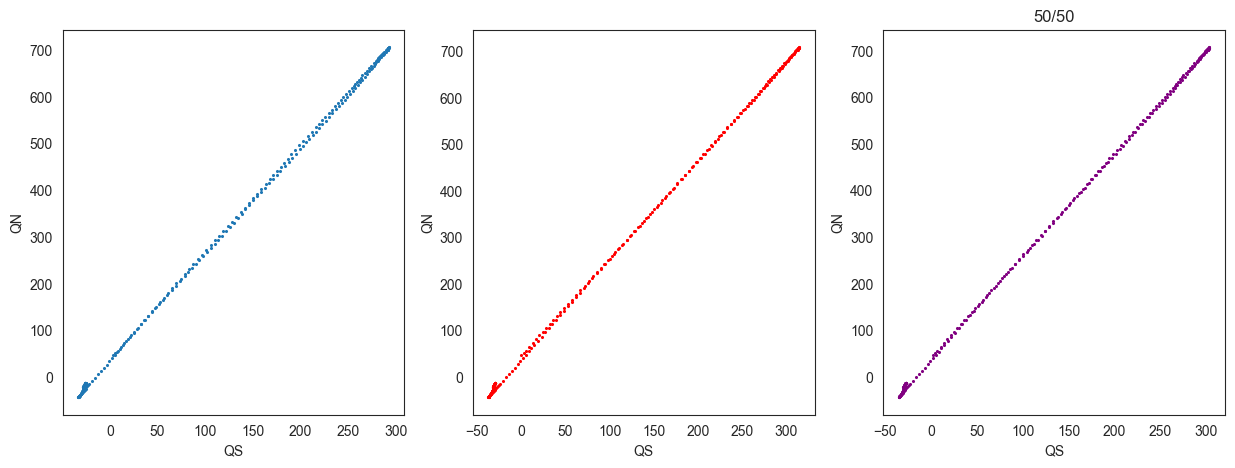

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ohm_suews = df_ohmtest2.SUEWS.loc[:]

ohm_suews.loc[1].loc['2018-07-01'].plot.scatter(
    x='QS',y='QN',s = 1.5, ax = ax[0])
ohm_suews.loc[2].loc['2018-07-01'].plot.scatter(
    x='QS',y='QN', s = 1.5 ,color = 'red', ax = ax[1])
ohm_suews.loc[3].loc['2018-07-01'].plot.scatter(
    x='QS',y='QN', s = 1.5 , color = 'purple', ax = ax[2]).set_title('50/50')


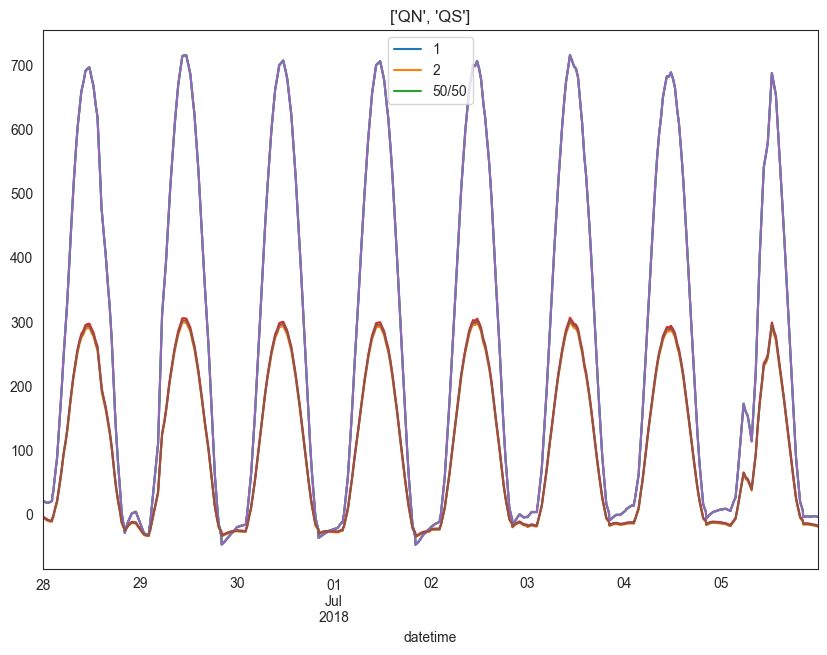

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))

ohm_suews = df_ohmtest.SUEWS
for var, axs  in zip([['QN','QS']], [0]):

    ohm_suews.loc[1,var].plot(ax = ax)
    ohm_suews.loc[2,var].plot(ax = ax)
    ohm_suews.loc[3,var].plot(ax=ax)

    ax.set_title(var)


ax.legend(['1','2', '50/50'])

In [ ]:
df_ohmtest2.SUEWS.loc[3,'QN']

datetime
2018-07-01 00:00:00   -23.845598
2018-07-01 00:05:00   -23.615583
2018-07-01 00:10:00   -23.403044
2018-07-01 00:15:00   -23.202116
2018-07-01 00:20:00   -23.008909
                         ...    
2018-07-01 23:35:00   -23.900535
2018-07-01 23:40:00   -23.417227
2018-07-01 23:45:00   -22.938627
2018-07-01 23:50:00   -22.460663
2018-07-01 23:55:00   -21.981835
Freq: 300s, Name: QN, Length: 288, dtype: float64

In [ ]:
sp.util.derive_ohm_coef(df_ohmtest.SUEWS.loc[2, 'QS'], df_ohmtest.SUEWS.loc[2, 'QN'])

(0.4302996796969266, 0.05098475911772211, -23.299984367767422)

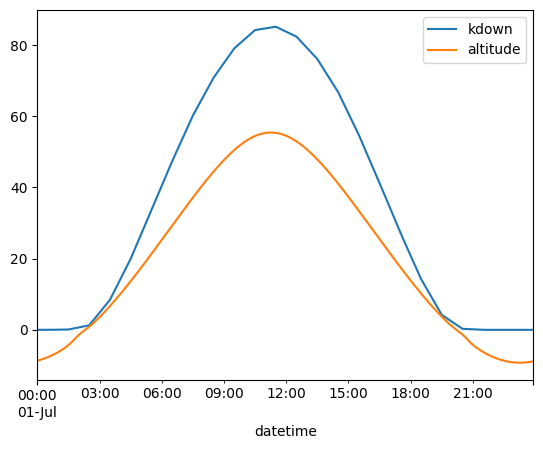

In [ ]:
ax = ((df_forcing.loc['2018-07-01', 'kdown'])/10).plot()
df_ohmtest.BEERS.loc[1].loc['2018-07-01','altitude'].plot(ax = ax)

ax.legend()

ind_dim,0
grid,
1,1.0
2,1.0
3,1.0
